# Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('./Fraudulent_E-Commerce_Transaction_Data_2.csv')

In [21]:
print(data.shape)

(23634, 16)


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [23]:
print(data.head())

                         Transaction ID                           Customer ID  \
0  c12e07a0-8a06-4c0d-b5cc-04f3af688570  8ca9f102-02a4-4207-ab63-484e83a1bdf0   
1  7d187603-7961-4fce-9827-9698e2b6a201  4d158416-caae-4b09-bd5b-15235deb9129   
2  f2c14f9d-92df-4aaf-8931-ceaf4e63ed72  ccae47b8-75c7-4f5a-aa9e-957deced2137   
3  e9949bfa-194d-486b-84da-9565fca9e5ce  b04960c0-aeee-4907-b1cd-4819016adcef   
4  7362837c-7538-434e-8731-0df713f5f26d  de9d6351-b3a7-4bc7-9a55-8f013eb66928   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               42.32  2024-03-24 23:42:43         PayPal      electronics   
1              301.34  2024-01-22 00:53:31    credit card      electronics   
2              340.32  2024-01-22 08:06:03     debit card     toys & games   
3               95.77  2024-01-16 20:34:53    credit card      electronics   
4               77.45  2024-01-16 15:47:23    credit card         clothing   

   Quantity  Customer Age    Customer Locati

In [24]:
print(data.describe())

       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        23634.000000  23634.000000  23634.000000   23634.000000   
mean           229.367099      3.000550     34.560210       0.051705   
std            282.046669      1.419663     10.009471       0.221436   
min             10.000000      1.000000     -2.000000       0.000000   
25%             69.070000      2.000000     28.000000       0.000000   
50%            151.415000      3.000000     35.000000       0.000000   
75%            296.127500      4.000000     41.000000       0.000000   
max           9716.500000      5.000000     73.000000       1.000000   

       Account Age Days  Transaction Hour  
count      23634.000000      23634.000000  
mean         178.660531         11.266015  
std          107.388682          6.980659  
min            1.000000          0.000000  
25%           84.000000          5.000000  
50%          178.000000         11.000000  
75%          272.000000         17.000000  

# Exploratory Data Analysis

In [25]:
# Change dtypes of categorical columns
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Payment Method'] = data['Payment Method'].astype('category')
data['Product Category'] = data['Product Category'].astype('category')
data['Device Used'] = data['Device Used'].astype('category')


In [26]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


Is Fraudulent
0    22412
1     1222
Name: count, dtype: int64


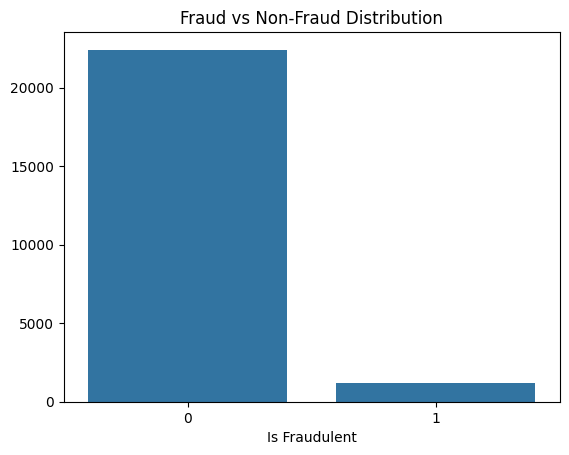

Fraud Ratio: 5.17051705170517%


In [27]:
# Visualize the distribution of the target variable
fraud_counts = data['Is Fraudulent'].value_counts()
print(fraud_counts)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()
print(f"Fraud Ratio: {data['Is Fraudulent'].mean() * 100}%")


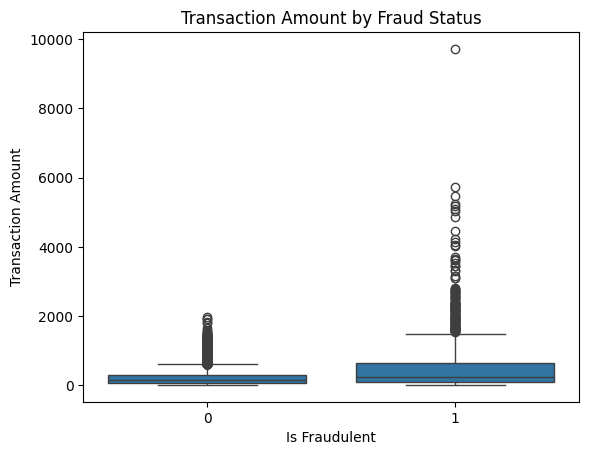

In [28]:
# Visualize transaction amounts for fraudulent vs non-fraudulent transactions
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=data)
plt.title("Transaction Amount by Fraud Status")
plt.show()

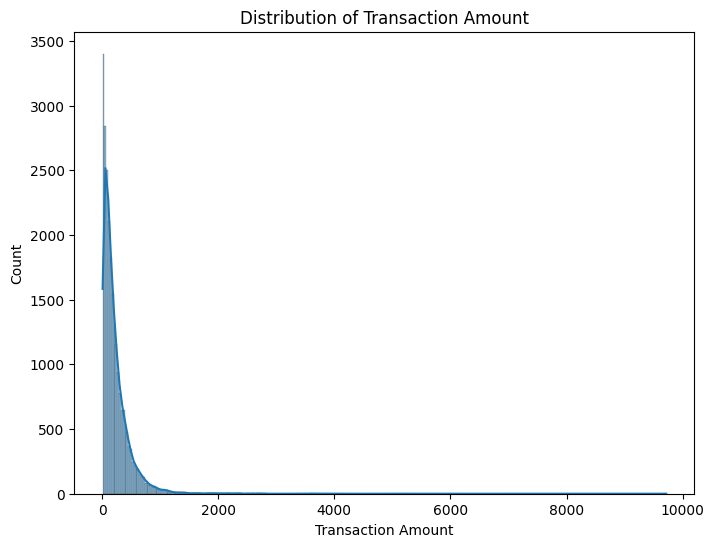

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Transaction Amount'], kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amount')
plt.show()

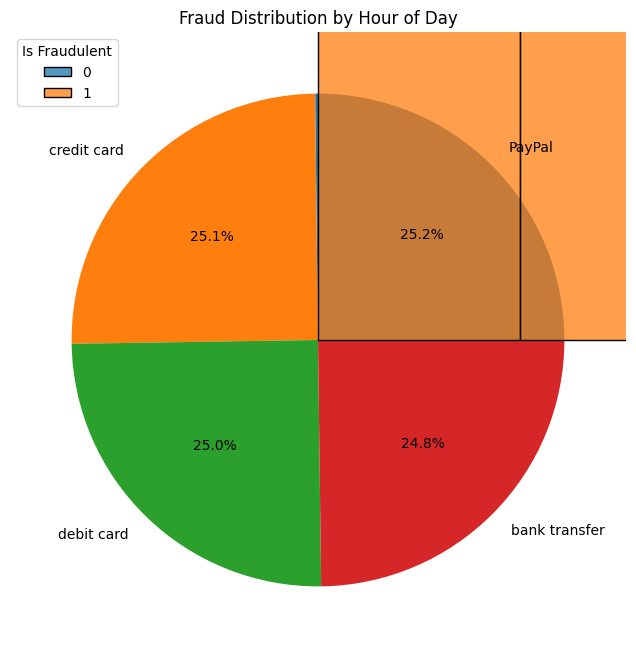

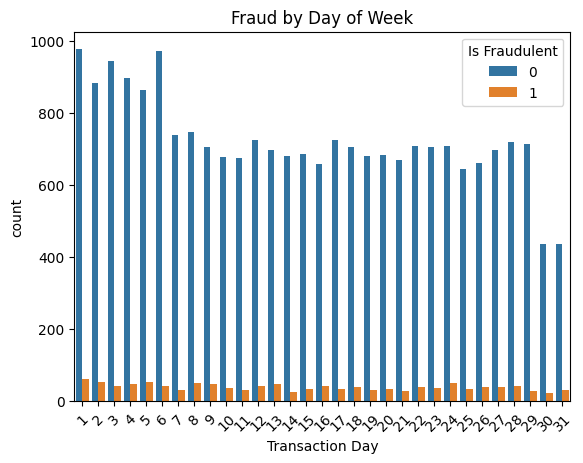

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(data['Payment Method'].value_counts(), labels=data['Payment Method'].unique(), autopct='%1.1f%%')
plt.title('Payment Method Distribution')
# Analyze Temporal Patterns
data['Transaction Hour'] = data['Transaction Date'].dt.hour
data['Transaction Day'] = data['Transaction Date'].dt.day

sns.histplot(data=data, x='Transaction Hour', hue='Is Fraudulent', multiple='stack')
plt.title("Fraud Distribution by Hour of Day")
plt.show()

sns.countplot(data=data, x='Transaction Day', hue='Is Fraudulent')
plt.title("Fraud by Day of Week")
plt.xticks(rotation=45)
plt.show()


/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_56064/2508335777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)


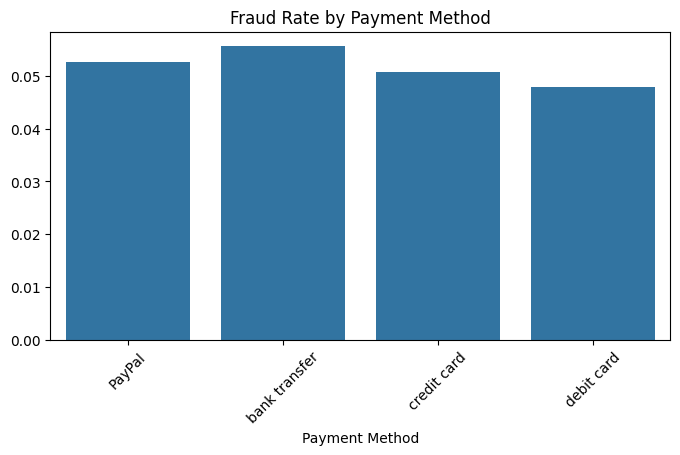

/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_56064/2508335777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)


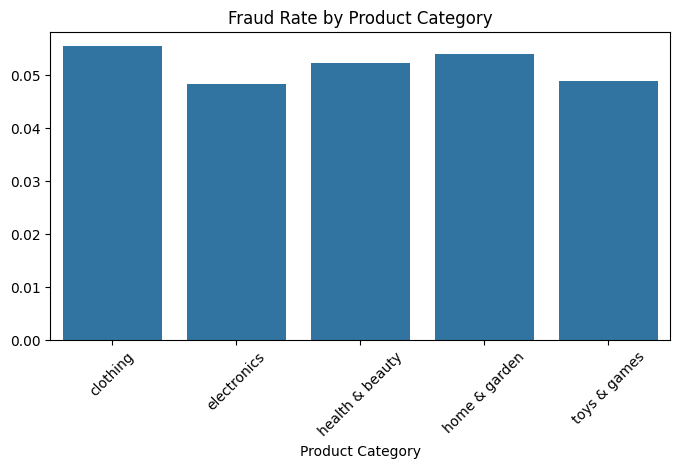

/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_56064/2508335777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)


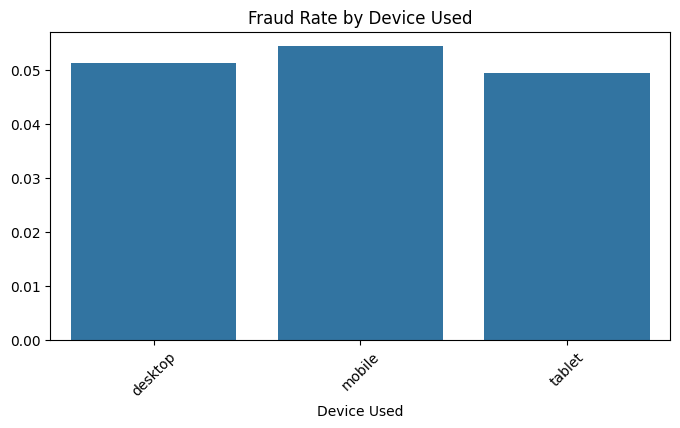

In [31]:
# Analyze fraud rates across categorical features
categorical_cols = ['Payment Method', 'Product Category', 'Device Used']

for col in categorical_cols:
    fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
    plt.title(f"Fraud Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()


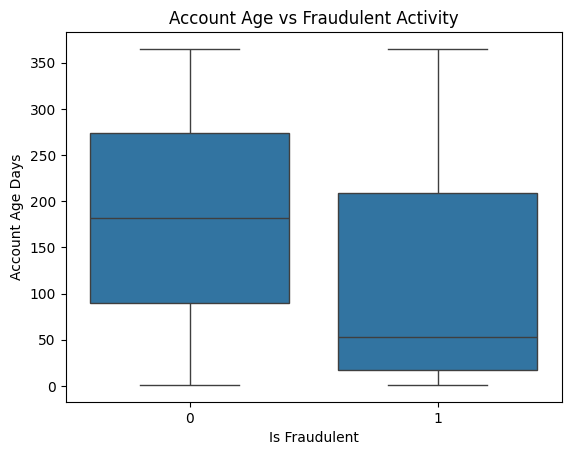

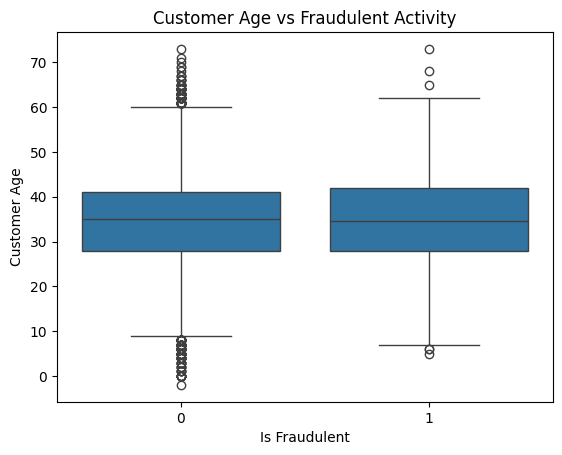

In [32]:
# Customer demographics analysis
sns.boxplot(x='Is Fraudulent', y='Account Age Days', data=data)
plt.title("Account Age vs Fraudulent Activity")
plt.show()

sns.boxplot(x='Is Fraudulent', y='Customer Age', data=data)
plt.title("Customer Age vs Fraudulent Activity")
plt.show()


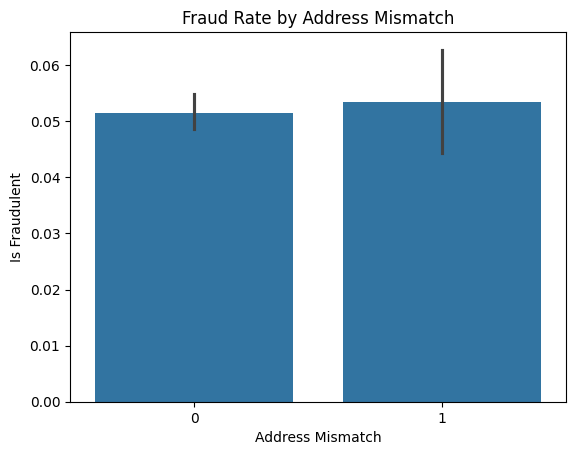

In [33]:
data['Address Mismatch'] = (data['Shipping Address'] != data['Billing Address']).astype(int)
sns.barplot(x='Address Mismatch', y='Is Fraudulent', data=data)
plt.title("Fraud Rate by Address Mismatch")
plt.show()

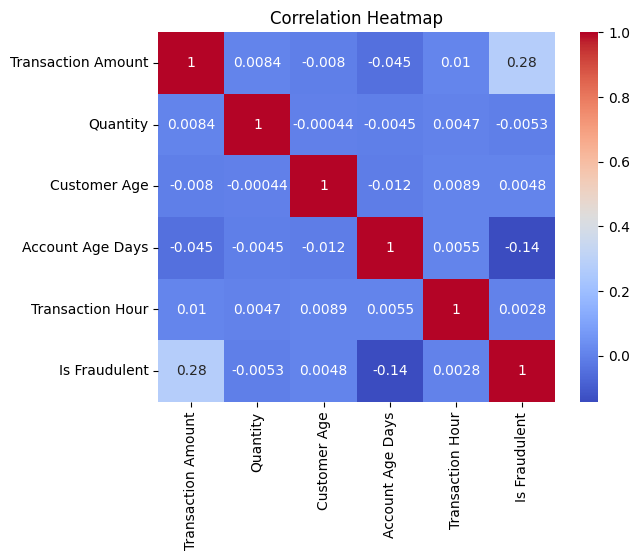

In [34]:
# Correlation analysis
numeric_cols = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
corr = data[numeric_cols + ['Is Fraudulent']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


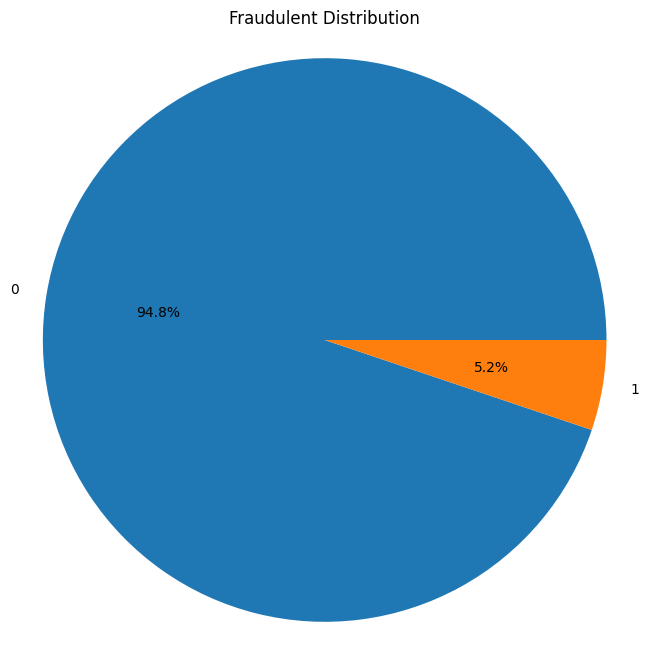

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(data['Is Fraudulent'].value_counts(), labels=data['Is Fraudulent'].unique(), autopct='%1.1f%%')
plt.title('Fraudulent Distribution')
plt.axis('equal')
plt.show()

Insight: Heavy Imbalance

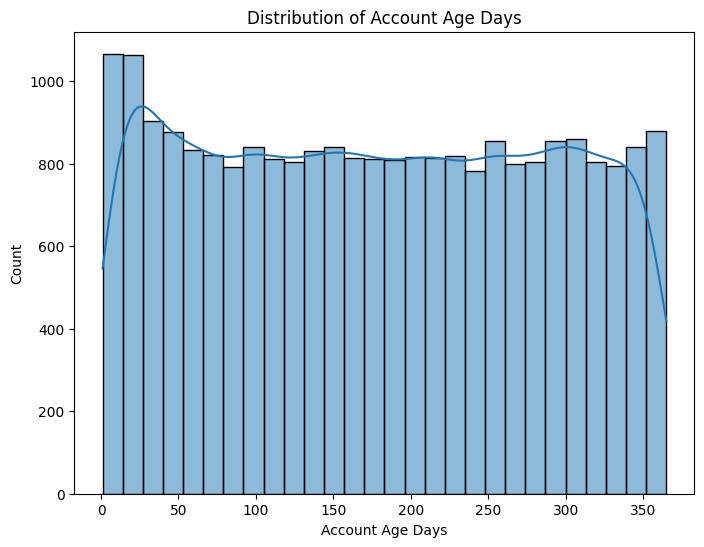

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Account Age Days'], kde=True)
plt.xlabel('Account Age Days')
plt.ylabel('Count')
plt.title('Distribution of Account Age Days')
plt.show()

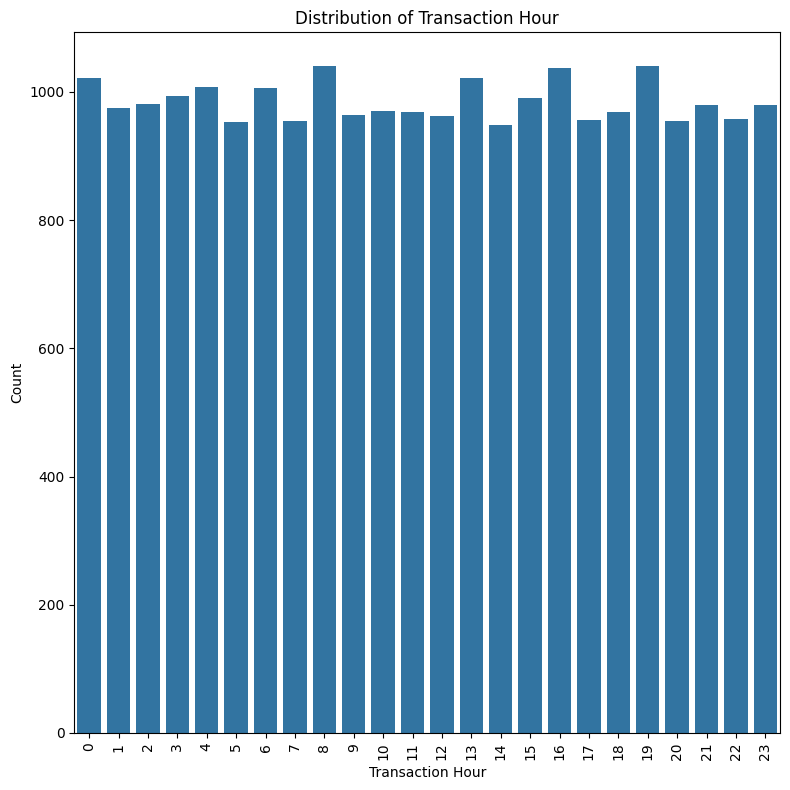

In [37]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Transaction Hour', data=data)
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.title('Distribution of Transaction Hour')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()